In [ ]:
#clustering


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file containing embeddings and cluster labels
csv_file = "/home/so87pot/n0w0f/structllm/src/structllm/models/combined_396_embed.csv"  # Replace with your CSV file path
data = pd.read_csv(csv_file, sep='\t')

In [14]:
len(data)

137641

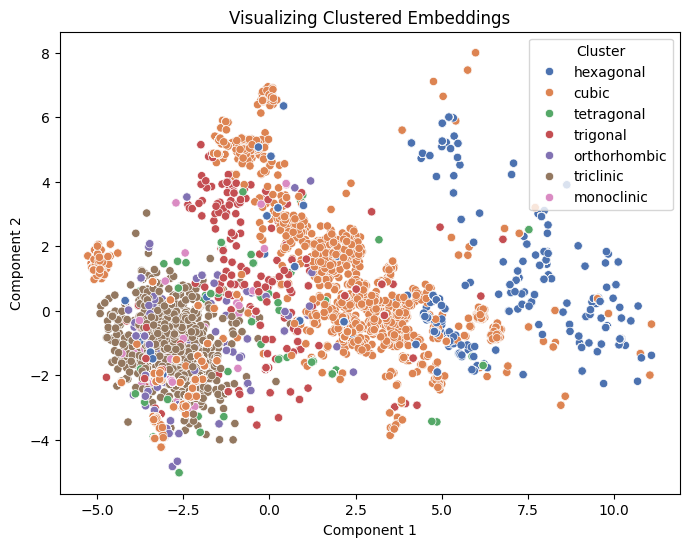

In [15]:
embedding_columns = data.columns[3:-1]  # Assuming embeddings are columns 3 to second-to-last

# Separate embeddings and cluster labels
embeddings = data.iloc[:, 3:-1].values  # Assuming embeddings start from column 3 and end before the last column
cluster_labels = data['crystal'].values

# Reduce dimensionality of embeddings for visualization (e.g., using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create DataFrame with reduced embeddings and cluster labels
df = pd.DataFrame(reduced_embeddings, columns=['Component 1', 'Component 2'])
df['Cluster'] = cluster_labels

# Plot clustered embeddings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='deep')
plt.title('Visualizing Clustered Embeddings')
plt.legend(title='Cluster')

# Save the plot as a PNG file
output_png = "combined_396_2_plot_true_labels.png"  # Set the desired output file name
plt.savefig(output_png)

# Display the plot
plt.show()


In [17]:
import pandas as pd
csv_file = "/home/so87pot/n0w0f/structllm/src/structllm/models/combined_130_emb.csv"  # Replace with your CSV file path
data = pd.read_csv(csv_file, sep='\t')

In [18]:
columns_to_keep = ['slices', 'formula', 'crystal', 'cluster']
df = data[columns_to_keep].copy()


In [19]:
# Filter rows where crystal is 'cubic'
cubic_df = df[df['crystal'] == 'cubic']

# Calculate count of each unique cluster in the filtered DataFrame
cluster_counts = cubic_df['cluster'].value_counts()


print(cluster_counts)

cluster
3    43771
0    24647
6     7095
1     7016
4     5695
2     2964
5     1211
Name: count, dtype: int64


In [20]:
import pandas as pd

def summarize_clusters_by_crystal(df):
    crystal_types = df['crystal'].unique()  # Get unique crystal types
    
    summary = {}  # Store summary for each crystal type
    
    for crystal_type in crystal_types:
        filtered_df = df[df['crystal'] == crystal_type]  # Filter rows by crystal type
        cluster_counts = filtered_df['cluster'].value_counts()  # Count clusters
        summary[crystal_type] = cluster_counts  # Store cluster counts for each crystal type
    
    return summary


summary_by_crystal = summarize_clusters_by_crystal(df)

# Print the summary
for crystal_type, counts in summary_by_crystal.items():
    print(f"Crystal Type: {crystal_type}")
    print(counts)
    print()


Crystal Type: hexagonal
cluster
4    10146
6     4102
2     2061
5     1929
0     1839
3      854
Name: count, dtype: int64

Crystal Type: cubic
cluster
3    43771
0    24647
6     7095
1     7016
4     5695
2     2964
5     1211
Name: count, dtype: int64

Crystal Type: tetragonal
cluster
2    5262
4    1428
0       7
Name: count, dtype: int64

Crystal Type: trigonal
cluster
0    4257
2    2853
5     768
1     600
4     385
Name: count, dtype: int64

Crystal Type: orthorhombic
cluster
0    4741
2     177
Name: count, dtype: int64

Crystal Type: triclinic
cluster
2    1329
0       3
Name: count, dtype: int64

Crystal Type: monoclinic
cluster
0    1947
2     554
Name: count, dtype: int64

